<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Ali Ekhterachian

**Student ID**: 400100576


## Importing Libraries

First we import libraries that we need for this assignment.

In [51]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# import any other libraries needed below
from sklearn.model_selection import train_test_split

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [52]:
X, Y = None, None

### START CODE HERE ###
df1_raw = pd.read_csv('data3_logistic.csv')

X = df1_raw.iloc[:, 0:-1]
Y = df1_raw.iloc[:, -1]

### END CODE HERE ###

print(X.shape)
print(Y.shape)


(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    .container {
      display: flex;
      flex-direction: row-reverse;
    }
    .text {
      flex: 1;
      text-align: justify;
    }
    .title {
      flex: 0;
      text-align: right;
      margin-left: 20px;
    }
  </style>
</head>
<body>
  <div class="container">
    <div class="text">
      <p dir="rtl">
    دلایل زیادی وجود دارد که دو مورد آن را توضیح می‌دهیم:
    
<br>
یکی از دلایل این است که وقتی از روابط مبتنی بر دترمینان استفاده می‌کنیم مقادیر فیچرها در آن ظاهر می‌شود و در طول گام اثر می‌گذارد و در صورت عدم استاندارد سازی نمی‌توان به راحتی طول قدم های مناسب را یافت.
<br>
دلیل دیگر مثلا در regularization است وقتی داده ها هم scale نباشند
ضریب هر فیچر معنای مختلفی دارد. به عبارتی دیگر به ما کمک می‌کند در prior 
از ماتریس کواریانس با درایه‌های قطری یکسان استفاده کنیم.
<br>
و...

</br>
البته بهتر بود ابتدا داده‌ها را به بخش‌های train و test 
تقسیم می‌کردیم و سپس نرمالیزه می‌کردیم تا اطلاعاتی از test به train 
لیک نشود، اما در این سوال تفاوت چندانی نداشت و مطابق روند خواسته شده پیش رفتیم.
</p>
    </div>
  </div>
</body>
</html>


In [53]:
### START CODE HERE ###
X = (X - X.mean())/X.std()
### END CODE HERE ###

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [54]:
### START CODE HERE ###
X.insert(0, 'Bias', np.ones(len(Y)))
X = X.to_numpy()
Y = Y.to_numpy()
### END CODE HERE ###

print(X.shape)

(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [55]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###
    result = 1/(1+np.exp(-Z))

    return result
    ### END CODE HERE ###


### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [56]:
def my_super_soft_log_sigmoid_func(a):
    h = sigmoid(a)
    ish0 = 1 -np.heaviside(h,0)
    ish1 = np.heaviside(h-1,1)
    logh = np.log(ish0+h) + (ish0*a)
    log1_h = np.log((1-h)+ish1) - (ish1*a)
    return logh, log1_h

In [57]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    
    m, n = X.shape
    loss = None
    ### START CODE HERE ###
    a = X @ theta
    logh, log1_h = my_super_soft_log_sigmoid_func(a)
    #h = sigmoid (a)
    #warnings.simplefilter('ignore')
    #logh = np.log(h)
    #log1_h = np.log(1-h)
    #warnings.simplefilter('default')
    
    #for i, hi in enumerate(h):
    #    if hi == 1  : # Nan log aprox.
    #        log1_h [i] = -a[i]
    #        
    #   elif hi==0: #Nan log aprox.
    #        logh = a[i]
    
    
         
    loss = (regLambda/2)*(np.linalg.norm(theta[1:])**2)
    loss -= y.T @ logh        
    loss -= (1-y).T @ log1_h
    loss /= len(y)
    ### END CODE HERE ###
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_j} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)}) \mathbf{x}^{(i)}  + \lambda \theta_j
$$


In [58]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''
    
    m, n = X.shape
    grad = None
    ### START CODE HERE ###
    h = sigmoid(X @ theta) 
    grad = (h - y) @ X 
    grad[1:] = grad[1:] + regLambda*(theta[1:])
    ### END CODE HERE ###
    return grad.T

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [59]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 1e-4, maxNumIters = 100, theta_history = False):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''
    
    m, n = X.shape
    theta, loss_history = None, None 
    ### START CODE HERE ###
    whist = []
    theta = np.zeros(n)
    theta_old = np.zeros(n)
    loss_history = []
    for _ in range(maxNumIters) :
        loss_history.append(computeCost(theta, X, y, regLambda))
        if theta_history:
            whist.append(theta)
        theta_old = theta
        theta = theta - alpha * computeGradient(theta, X, y, regLambda)
        if hasConverged(theta_old, theta, epsilon):
            break

    
    loss_history.append(computeCost(theta, X, y, regLambda))
    if theta_history:
        whist.append(theta)
        loss_history = [loss_history, whist]
    
    ### END CODE HERE ###
    return theta, loss_history




def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    
    ### START CODE HERE ###
    
    ### END CODE HERE ###
    return (np.linalg.norm(theta_old - theta_new) < epsilon)

Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

θ : [ -5.94563046 -16.21853487  15.61380481   0.47058414]


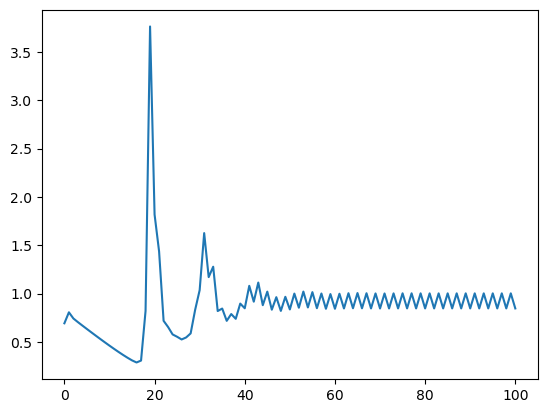

In [60]:
theta, loss_history = fit(X, Y, regLambda=0) # calculating theta and loss of each iteration
### START CODE HERE ###
print('θ :',theta)
plt.plot(loss_history);
### END CODE HERE ###

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [61]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=104, test_size=0.3, shuffle=True)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, random_state=100, test_size=0.33333, shuffle=True)

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

### END CODE HERE ###

(7000, 4) (7000,)
(2000, 4) (2000,)
(1000, 4) (1000,)


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [62]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    
    Y = None
    ### START CODE HERE ###
    Y = np.heaviside(X @ theta,1)
    ### END CODE HERE ###
    return Y

def test_loss_calc(x,y,theta_list,reg):
    result = []
    for theta in theta_list:
        result.append(computeCost(theta,x,y,reg))
    return result

def predict_accuracy(w, x, y):
    myY = predict(x, w)
    return 100 - (np.sum(np.abs(y - myY))*(100/len(y)))

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    .container {
      display: flex;
      flex-direction: row-reverse;
    }
    .text {
      flex: 1;
      text-align: justify;
    }
    .title {
      flex: 0;
      text-align: right;
      margin-left: 20px;
    }
  </style>
</head>
<body>
  <div class="container">
    <div class="text">
      <p dir="rtl">
با توجه به نمودار های رسم شده از 
lr = 0.002 
استفاده می‌کنیم چرا که این مقدار با ایتریشن های بسییار کمی (40 تا 60) به همگرایی رسیده است و 
lr 
های کمتر ایتریشن بیشتر می‌خواهند و lr های بیشتر نیز مطابق دو ردیف آخر اصلا به همگرایی نمی‌رسند.
<br>
همچنین از 
λ = 0.1 
استفاده می‌کنیم.
دقت شود این پارامتر هارا بر اساس نمودار ها به کمک validation set انتخاب شدند و از
داده‌های test استفاده ای هنوز نشده است. که در بخش نتیجه گیری استفاده خواهیم کرد.
</br>
</p>
    </div>
  </div>
</body>
</html>


6it [00:16,  2.81s/it]


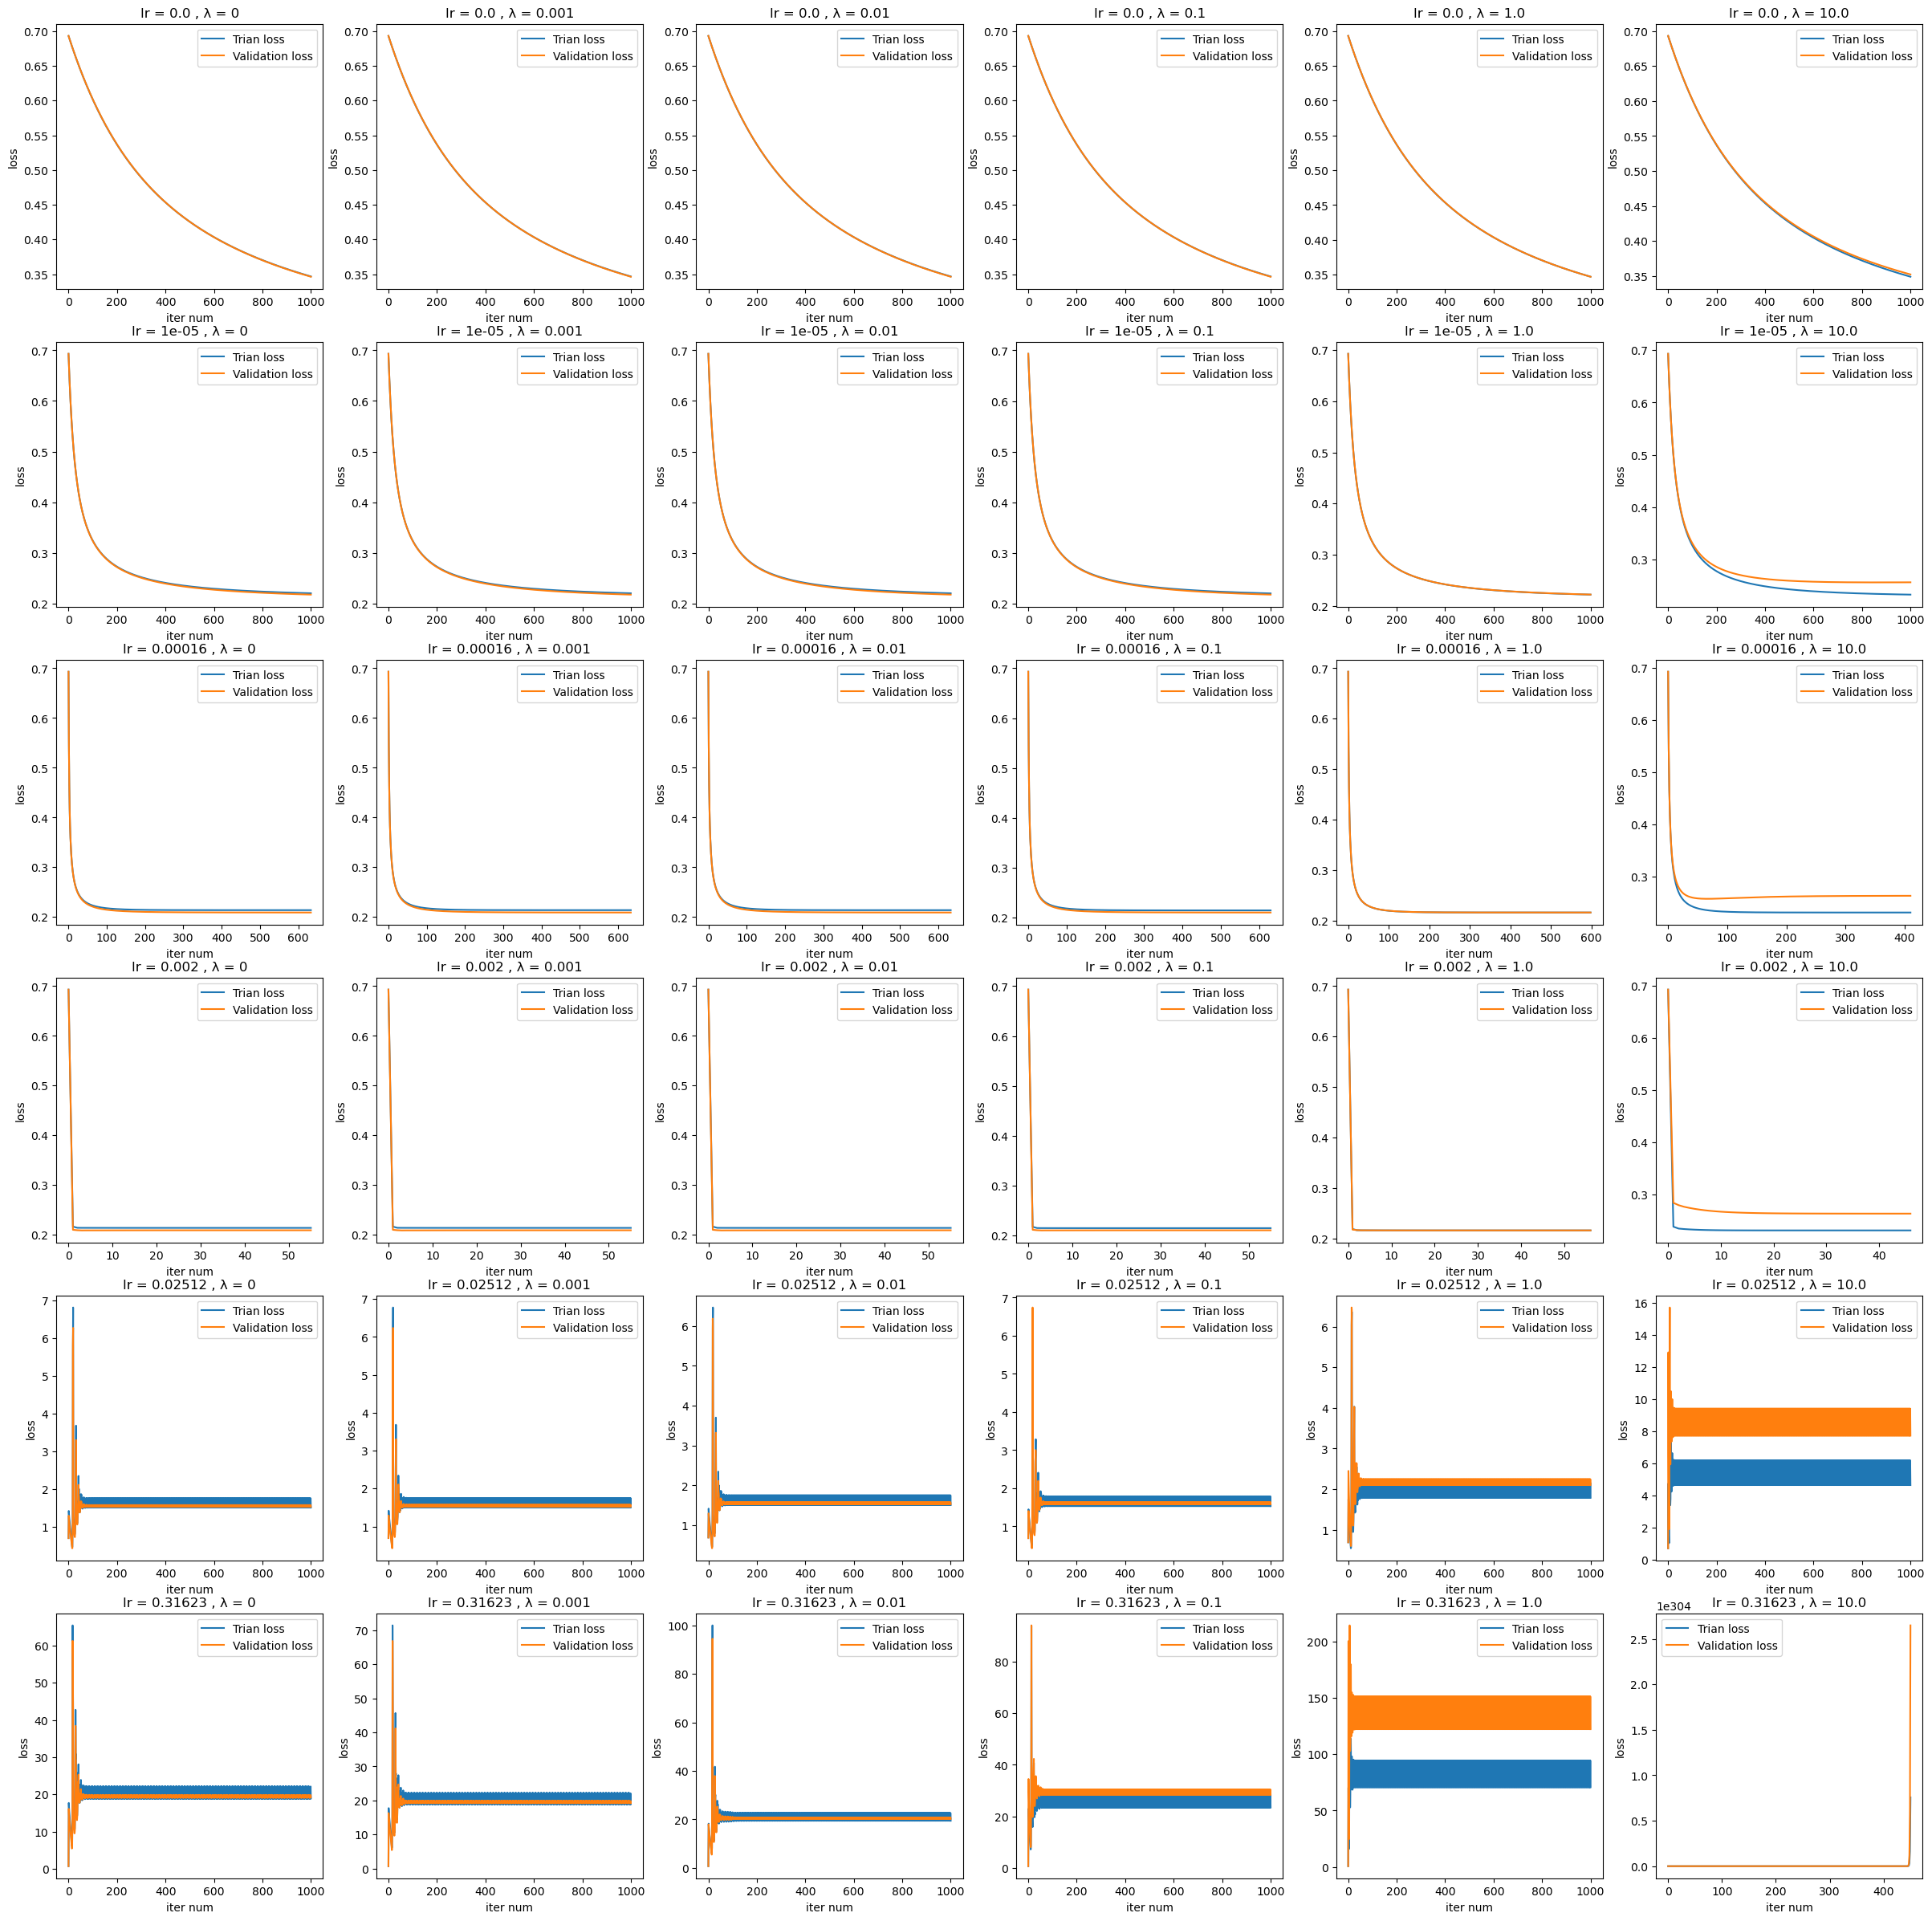

In [63]:
### START CODE HERE ###
warnings.simplefilter('ignore')
reg_const_vals = [0] + np.logspace(-3,1,5).tolist()
lr_vals = np.logspace(-6,-0.5,6).tolist()

fig, axs = plt.subplots(len(lr_vals), len(reg_const_vals), figsize=(len(reg_const_vals)*5, len(lr_vals)*5))
result_w, result_hist = [], []

for i, lr_val in tqdm(enumerate(lr_vals)):
    for j, reg_val in enumerate(reg_const_vals):
        tempw, templh = fit(X_train, Y_train, regLambda=reg_val, alpha=lr_val, maxNumIters=1000, theta_history=True) 
        result_w.append(tempw)
        result_hist.append(templh)
        plo = axs[i][j]
        plo.plot(templh[0], label = 'Trian loss')
        plo.plot(test_loss_calc(X_val,Y_val,templh[1], reg_val), label = 'Validation loss')
        plo.set_xlabel('iter num')
        plo.set_ylabel('loss')
        plo.set_title('lr = '+str(round(lr_val, 5))+ ' , λ = '+ str(round(reg_val,4)))
        plo.legend()

### END CODE HERE ###

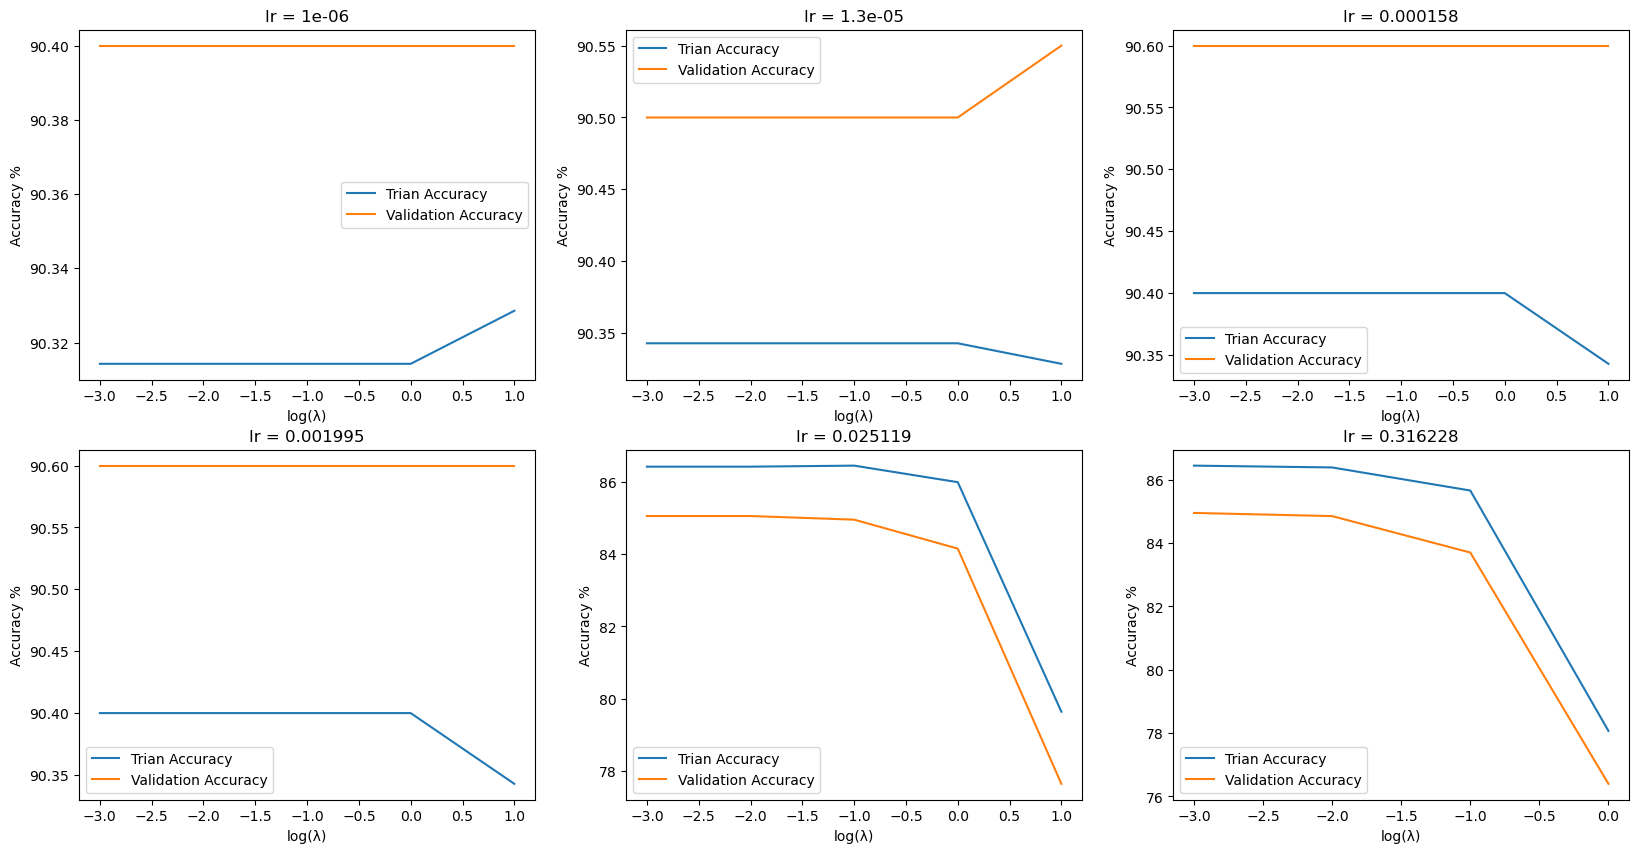

In [64]:
### Accuracy plot ###

plt.figure(figsize=(20, 10))
k = 0
for i, lr_val in enumerate(lr_vals):
    temp_result_val = []
    temp_result_train = []
    for j, reg_val in enumerate(reg_const_vals):
        temp_result_train.append(predict_accuracy(result_w[k], X_train, Y_train))
        temp_result_val.append(predict_accuracy(result_w[k], X_val, Y_val))
        k += 1
        
    plt.subplot(2, 3, i+1)    
    plt.plot(np.log10(reg_const_vals), temp_result_train, label = 'Trian Accuracy')
    plt.plot(np.log10(reg_const_vals), temp_result_val, label = 'Validation Accuracy')
    plt.xlabel('log(λ)')
    plt.ylabel('Accuracy %')
    plt.title('lr = '+str(round(lr_val, 6)))
    plt.legend();
    
selected_params_LR = result_w[21]



## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 
صحت یادگیری را برای سه مجموعه داده پرینت کرده‌ایم.

In [65]:
### START CODE HERE ###
from sklearn.naive_bayes import GaussianNB

#  ################################################################# #
#  ################################################################# #
# ### My Naive Bayes Imp. is commented you can uncomment it if needed. #
#  ################################################################# #
#  ################################################################# #


'''
def prior_GDA(y):
    unique, counts = np.unique(y, return_counts=True)
    prior = {}
    for i in range(len(unique)):
        prior[unique[i]] = counts[i]/len(y)
        
    return prior


def class_cond_naive_bayes(x_tr, y_tr):
    unique= np.unique(y_tr)
    indc = {}
    for u in unique:
        indc[u] = np.where(y_tr == u)
        
    mu = {}
    for u in unique:
        mu[u] = (np.mean(x_tr[indc[u],:], axis=1))
    
    var = {}
    for u in unique:
        temp = (x_tr[indc[u],:][0,:,:]-mu[u])
        var[u] = np.mean(temp*temp,0)
        
    return mu, var


def train_NB(x_tr, y_tr):
    p = prior_GDA(y_tr)
    m, v = class_cond_naive_bayes(x_tr, y_tr)
    
    return p ,m ,v


def predict_NB(train_param, x_te):
    post, mu, var = train_param
    cats = post.keys()
    result = np.zeros([x_te.shape[0], len(cats)])
    for i, c in enumerate(cats):
        lp = np.log(post[c])
        s1 = (-np.log(var[c])) + lp
        s2 = (-0.5) * (x_te-mu[0]) / var[c]
        result[:,i] = np.sum(s1+s2, 1)
    
    return np.array(list(cats))[np.argmax(result,1)]
        
def accuracy_y(myY,y):
    return 100 - (np.sum(np.abs(y - myY))*(100/len(y)))

# Train Naive Bayes
train_result_NB = train_NB(X_train[:,1:], Y_train) #bias ignore

# Naive Bayes Prediction
train_pred_NB = predict_NB(train_result_NB, X_train[:,1:]) #bias ignore
val_pred_NB   = predict_NB(train_result_NB, X_val[:,1:])   #bias ignore
test_pred_NB  = predict_NB(train_result_NB, X_test[:,1:])  #bias ignore

print('******************************')
print('**** My Implementation NB ****')
print('******************************')
print('Naive Bayes Train Accuracy : ', accuracy_y(train_pred_NB, Y_train))
print('Naive Bayes Validation Accuracy : ', accuracy_y(val_pred_NB, Y_val))
print('Naive Bayes Test Accuracy : ', accuracy_y(test_pred_NB , Y_test))
print()
'''
print('******************************')
print('**** sklearrn Gaussion NB ****')
print('******************************')
NBC = GaussianNB()
NBC.fit(X_train[:,1:], Y_train) #bias ignore

y_train_NBC = NBC.predict(X_train[:,1:])
y_val_NBC = NBC.predict(X_val[:,1:])
y_test_NBC = NBC.predict(X_test[:,1:])

print('Naive Bayes Train Accuracy : ', accuracy_y(y_train_NBC, Y_train))
print('Naive Bayes Validation Accuracy : ', accuracy_y(y_val_NBC, Y_val))
print('Naive Bayes Test Accuracy : ', accuracy_y(y_test_NBC , Y_test))



### END CODE HERE ###

******************************
**** sklearrn Gaussion NB ****
******************************
Naive Bayes Train Accuracy :  88.62857142857143
Naive Bayes Validation Accuracy :  89.55
Naive Bayes Test Accuracy :  87.7


In [66]:
####################################
########### sklearn NB ##############
####################################
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

Y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_y(Y_test, Y_pred)

print("Accuracy of Gaussian Naive Bayes classifier on test set:", accuracy)


Accuracy of Gaussian Naive Bayes classifier on test set: 87.7


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

In [67]:
### START CODE HERE ###
def class_cond_LDA(x_tr, y_tr):
    unique= np.unique(y_tr)
    indc = {}
    for u in unique:
        indc[u] = np.where(y_tr == u)
        
    mu = {}
    for u in unique:
        mu[u] = (np.mean(x_tr[indc[u],:], axis=1))
    
    var = np.zeros([x_tr.shape[1], x_tr.shape[1]])
    for u in unique:
        temp = (x_tr[indc[u],:][0,:,:]-mu[u])
        var += (temp.T @ temp)
    
    var /= len(y_tr)
    return mu, var


def train_LDA(x_tr, y_tr):
    p = prior_GDA(y_tr)
    m, v = class_cond_LDA(x_tr, y_tr)
    
    gamma = {}
    beta = {}
    sig_inv = np.linalg.inv(v)
    for c in p.keys():
        beta[c] = (sig_inv @ m[c].T)
        gamma[c] = np.log(p[c]) - (0.5* (m[c] @ beta[c]))[0,0]

    
    return gamma ,beta


def predict_LDA(param, x_te):
    gamma ,beta = param
    cats = gamma.keys()
    result = np.zeros([x_te.shape[0], len(cats)])
    for i, c in enumerate(cats):
        result[:,i] = gamma[c] + (x_te @ beta[c])[:,0]
        
    return np.array(list(cats))[np.argmax(result,1)]    
    
    
    
# LDA Training
param_LDA_train = train_LDA(X_train[:,1:],Y_train)


# LDA Prediction
train_pred_LDA = predict_LDA(param_LDA_train, X_train[:,1:]) #bias ignore
val_pred_LDA   = predict_LDA(param_LDA_train, X_val[:,1:])   #bias ignore
test_pred_LDA  = predict_LDA(param_LDA_train, X_test[:,1:])  #bias ignore


print('LDA Train Accuracy : ', accuracy_y(train_pred_LDA, Y_train))
print('LDA Validation Accuracy : ', accuracy_y(val_pred_LDA, Y_val))
print('LDA Test Accuracy : ', accuracy_y(test_pred_LDA , Y_test))



### END CODE HERE ###

LDA Train Accuracy :  90.3
LDA Validation Accuracy :  90.6
LDA Test Accuracy :  89.5


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**:
مجددا دقت  تست را برای هر سه روش چاپ میکنیم


In [68]:
print('LR Validation Accuracy : ', predict_accuracy(selected_params_LR, X_test, Y_test))
print('Naive Bayes Test Accuracy : ', accuracy_y(y_test_NBC , Y_test))
print('LDA Test Accuracy : ', accuracy_y(test_pred_LDA , Y_test))


LR Validation Accuracy :  90.0
Naive Bayes Test Accuracy :  87.7
LDA Test Accuracy :  89.5


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    .container {
      display: flex;
      flex-direction: row-reverse;
    }
    .text {
      flex: 1;
      text-align: justify;
    }
    .title {
      flex: 0;
      text-align: right;
      margin-left: 20px;
    }
  </style>
</head>
<body>
  <div class="container">
    <div class="text">
      <p dir="rtl">
Logistic Regression 
و
LDA 
دقت نزدیک و خوبی دارند ولی 
Naive Bayes
دقت کمی کمتری دارد ولی در  مجموع مناسب است و اختلاف چندانی ندارد.
</br>
</p>
    </div>
  </div>
</body>
</html>